In [542]:
import plotly
# import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mysql.connector
import config
import warnings
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set_style('darkgrid')

warnings.simplefilter('ignore')

In [508]:
dbname = 'nba'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    db = dbname
)
cursor = cnx.cursor(buffered = True)

In [247]:
stmt = "SELECT * from nba.shot_chart"
cursor.execute(stmt)
scores = cursor.fetchall()

field_names = [i[0] for i in cursor.description]
shots = pd.DataFrame(scores)
shots.columns = field_names

In [8]:
shots.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [412]:
type(shots['GAME_ID'].values[0])

str

In [9]:
shots[shots['PLAYER_NAME'] == 'Ben Simmons']

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  PLAYER_NAME  \
403975  Shot Chart Detail  0021700006             33    1627732  Ben Simmons   
403976  Shot Chart Detail  0021700006             47    1627732  Ben Simmons   
403977  Shot Chart Detail  0021700006             77    1627732  Ben Simmons   
403978  Shot Chart Detail  0021700006            182    1627732  Ben Simmons   
403979  Shot Chart Detail  0021700006            187    1627732  Ben Simmons   
...                   ...         ...            ...        ...          ...   
406069  Shot Chart Detail  0021900230             73    1627732  Ben Simmons   
406070  Shot Chart Detail  0021900230            301    1627732  Ben Simmons   
406071  Shot Chart Detail  0021900230            394    1627732  Ben Simmons   
406072  Shot Chart Detail  0021900230            442    1627732  Ben Simmons   
406073  Shot Chart Detail  0021900230            452    1627732  Ben Simmons   

           TEAM_ID           TEAM_NAME  PERIOD  MINUTES_REMAINING  \
403975  1610612755  Philadelphia 76ers       1                  9   
403976  1610612755  Philadelphia 76ers       1                  8   
403977  1610612755  Philadelphia 76ers       1                  5   
403978  1610612755  Philadelphia 76ers       2                 11   
403979  1610612755  Philadelphia 76ers       2                 10   
...            ...                 ...     ...                ...   
406069  1610612755  Philadelphia 76ers       1                  5   
406070  1610612755  Philadelphia 76ers       2                  2   
406071  1610612755  Philadelphia 76ers       3                  8   
406072  1610612755  Philadelphia 76ers       3                  3   
406073  1610612755  Philadelphia 76ers       3                  3   

        SECONDS_REMAINING  ... SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  \
403975                 44  ...      Center(C)  Less Than 8 ft.             3   
403976                 28  ...      Center(C)  Less Than 8 ft.             1   
403977                 54  ...  Right Side(R)         8-16 ft.             9   
403978                 43  ...      Center(C)  Less Than 8 ft.             0   
403979                 42  ...      Center(C)  Less Than 8 ft.             0   
...                   ...  ...            ...              ...           ...   
406069                 43  ...      Center(C)  Less Than 8 ft.             1   
406070                 19  ...      Center(C)  Less Than 8 ft.             3   
406071                 10  ...      Center(C)  Less Than 8 ft.             6   
406072                 58  ...      Center(C)  Less Than 8 ft.             6   
406073                 16  ...      Center(C)  Less Than 8 ft.             3   

       LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  HTM  VTM  
403975   -18    26                   1               0   20171018  WAS  PHI  
403976    12    11                   1               1   20171018  WAS  PHI  
403977    73    55                   1               1   20171018  WAS  PHI  
403978     0    -6                   1               1   20171018  WAS  PHI  
403979     8     1                   1               1   20171018  WAS  PHI  
...      ...   ...                 ...             ...        ...  ...  ...  
406069     3    13                   1               1   20191123  PHI  MIA  
406070    -4    32                   1               0   20191123  PHI  MIA  
406071   -30    59                   1               0   20191123  PHI  MIA  
406072    -5    62                   1               0   20191123  PHI  MIA  
406073    -6    32                   1               0   20191123  PHI  MIA  

[2099 rows x 24 columns]

In [11]:
string = '2017'
string = string[0] + string[2:]
string

'217'

In [27]:
fig = go.Figure()

# Create scatter trace of text labels

# Set axes properties
fig.update_xaxes(range=[0, 4.5], zeroline=False)
fig.update_yaxes(range=[0, 4.5])

# Add circles
fig.update_layout(
    shapes=[
        # unfilled circle
        go.layout.Shape(
            type="circle",
            xref="x",
            yref="y",
            x0=1,
            y0=1,
            x1=3,
            y1=3,
            line_color="LightSeaGreen",
        ),
        # filled circle
        go.layout.Shape(
            type="circle",
            xref="x",
            yref="y",
            fillcolor="PaleTurquoise",
            x0=3,
            y0=3,
            x1=4,
            y1=4,
            line_color="LightSeaGreen",
        ),
    ]
)

# Set figure size
fig.update_layout(width=800, height=800)

fig.show()

In [54]:
def ellipse_arc(x_center=0, y_center=0, a=1, b =1, start_angle=0, end_angle=2*np.pi, N=100, closed= False):
    t = np.linspace(start_angle, end_angle, N)
    x = x_center + a*np.cos(t)
    y = y_center + b*np.sin(t)
    path = f'M {x[0]}, {y[0]}'
    for k in range(1, len(t)):
        path += f'L{x[k]}, {y[k]}'
    if closed:
        path += ' Z'
    return path    

fig = go.Figure()

# Create a minimal trace 
fig.add_trace(go.Scatter(
    x=[0],
    y=[0.2],
    marker_size=0.1
));

fig.update_layout(width =600, height=400,
           xaxis_range=[-5.2, 5.2], 
           yaxis_range=[-3.2, 3.2],       
    shapes=[
           dict(type="path",
           path= ellipse_arc(a=5, b=3, start_angle=-np.pi/6, end_angle=3*np.pi/2, N=60),
           line_color="RoyalBlue"),
           dict(type="path",
                path = ellipse_arc(x_center=2, a= 0.5, b= 1.5, closed=True),
                fillcolor="LightPink",
                line_color="Crimson")
        ]
        );
fig.show()

In [143]:
 court_shapes =[go.layout.Shape(
            type="circle",
            xref="x",
            yref="y",
            x0=-7.5,
            y0=-7.5,
            x1=7.5,
            y1=7.5,
            line_color="Black",
        ),
            go.layout.Shape(
            type="rect",
            x0=-30,
            y0=-7.5,
            x1=30,
            y1=-7.5,
            line_color="Black"),
            
            go.layout.Shape(
            type="rect",
            x0=-80,
            y0=-47.5,
            x1=80,
            y1=142.5,
            line_color="Black"),
             
            go.layout.Shape(
            type="rect",
            x0=-60,
            y0=-47.5,
            x1=60,
            y1=142.5,
            line_color="Black"),
               
            dict(type="path",
            path= ellipse_arc(y_center= 140, a=60, b=60, start_angle=0, end_angle=3*np.pi/3, N=100),
            line_color="Black"),
               
            dict(type="path",
            path= ellipse_arc(y_center= 140, a=60, b=60, start_angle=0, end_angle=-3*np.pi/3, N=100),
            line_color="Black"),
               
            go.layout.Shape(
            type="rect",
            x0=-220,
            y0=-47.5,
            x1=-220,
            y1=92.5,
            line_color="Black"),  
            
            go.layout.Shape(
            type="rect",
            x0=220,
            y0=-47.5,
            x1=220,
            y1=92.5,
            line_color="Black"),
                
            
            dict(type="path",
            path= ellipse_arc(y_center= 92.5, a=220, b=146.5, start_angle=0, end_angle=3*np.pi/3, N=100),
            line_color="Black"),
                
            go.layout.Shape(
            type="rect",
            x0=-250,
            y0=-47.5,
            x1=250,
            y1=422.5,
            line_color="Black"),
             
            dict(type="path",
            path= ellipse_arc(a=40, b=40, start_angle=0, end_angle=3*np.pi/3, N=100),
            line_color="Black"),
                
            dict(type="path",
            path= ellipse_arc(y_center= 422.5, a=60, b=60, start_angle=0, end_angle=-3*np.pi/3, N=100),
            line_color="Black"),
            
            dict(type="path",
            path= ellipse_arc(y_center= 422.5, a=20, b=20, start_angle=0, end_angle=-3*np.pi/3, N=100),
            line_color="Black"),   
               ]  



In [144]:
N = 1000
t = np.linspace(0, 10, 100)
y = np.sin(t)

layout = go.Layout(
        shapes=court_shapes)
fig = go.Figure(data=go.Scatter(x=t, y=y, mode='markers',
                               ),
               layout=layout)

fig.show()

In [413]:
shots[shots.GAME_ID.str.contains('00217')]

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0       Shot Chart Detail  0021700885            643    1627744   
1       Shot Chart Detail  0021700885            645    1627744   
2       Shot Chart Detail  0021700898            657    1627744   
3       Shot Chart Detail  0021700898            671    1627744   
4       Shot Chart Detail  0021700931            124    1627744   
...                   ...         ...            ...        ...   
472862  Shot Chart Detail  0021701223            562    1628425   
472863  Shot Chart Detail  0021701223            600    1628425   
472864  Shot Chart Detail  0021701223            611    1628425   
472865  Shot Chart Detail  0021701223            619    1628425   
472866  Shot Chart Detail  0021701223            652    1628425   

           PLAYER_NAME     TEAM_ID          TEAM_NAME  PERIOD  \
0        Brice Johnson  1610612763  Memphis Grizzlies       4   
1        Brice Johnson  1610612763  Memphis Grizzlies       4   
2        Brice Johnson  1610612763  Memphis Grizzlies       4   
3        Brice Johnson  1610612763  Memphis Grizzlies       4   
4        Brice Johnson  1610612763  Memphis Grizzlies       1   
...                ...         ...                ...     ...   
472862  Sterling Brown  1610612749    Milwaukee Bucks       4   
472863  Sterling Brown  1610612749    Milwaukee Bucks       4   
472864  Sterling Brown  1610612749    Milwaukee Bucks       4   
472865  Sterling Brown  1610612749    Milwaukee Bucks       4   
472866  Sterling Brown  1610612749    Milwaukee Bucks       4   

        MINUTES_REMAINING  SECONDS_REMAINING  ...        SHOT_ZONE_AREA  \
0                       1                 31  ...             Center(C)   
1                       1                 27  ...             Center(C)   
2                       1                 19  ...             Center(C)   
3                       0                 12  ...             Center(C)   
4                       2                 36  ...             Center(C)   
...                   ...                ...  ...                   ...   
472862                 10                 39  ...  Left Side Center(LC)   
472863                  7                  7  ...             Center(C)   
472864                  6                  7  ...             Center(C)   
472865                  5                 25  ...         Right Side(R)   
472866                  1                 54  ...             Center(C)   

        SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  \
0       Less Than 8 ft.             2   -25     5                   1   
1       Less Than 8 ft.             0     0    -6                   1   
2       Less Than 8 ft.             2    17    20                   1   
3       Less Than 8 ft.             2   -18    10                   1   
4              8-16 ft.            15    23   151                   1   
...                 ...           ...   ...   ...                 ...   
472862          24+ ft.            25  -171   193                   1   
472863  Less Than 8 ft.             1    13    11                   1   
472864        16-24 ft.            18   -30   184                   1   
472865         8-16 ft.            14   128    73                   1   
472866  Less Than 8 ft.             4    41     1                   1   

        SHOT_MADE_FLAG  GAME_DATE  HTM  VTM  
0                    0   20180224  MIA  MEM  
1                    0   20180224  MIA  MEM  
2                    1   20180226  BOS  MEM  
3                    1   20180226  BOS  MEM  
4                    0   20180302  MEM  DEN  
...                ...        ...  ...  ...  
472862               0   20180411  PHI  MIL  
472863               1   20180411  PHI  MIL  
472864               0   20180411  PHI  MIL  
472865               0   20180411  PHI  MIL  
472866               0   20180411  PHI  MIL  

[212048 rows x 24 columns]

In [214]:
def shot_chart(name, year=''):    
    if year:
        year_clean = '00' + year[0] + year[2:]
        player = shots[(shots.PLAYER_NAME == name) & (shots.GAME_ID.str.contains(year_clean))]
    else:
        player= shots[shots.PLAYER_NAME == name]

    missed_shot_trace = go.Scattergl(
            x = player[player.SHOT_MADE_FLAG == 0]['LOC_X'],
            y = player[player.SHOT_MADE_FLAG == 0]['LOC_Y'],
            mode = 'markers',
            name = 'Miss',
            marker= dict(color='blue', symbol='x', size=8, line={'width':1}, opacity=0.7),
            text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 0]['ACTION_TYPE']],
            hoverinfo = 'text'
        )
    made_shot_trace = go.Scattergl(
        x = player[player.SHOT_MADE_FLAG == 1]['LOC_X'],
        y = player[player.SHOT_MADE_FLAG == 1]['LOC_Y'],
        mode = 'markers',
        name='Make',
        marker= dict(color='red', symbol='circle', size=8, line={'width':1}, opacity=0.7),
        text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 1]['ACTION_TYPE']],
        hoverinfo = 'text'
    )

    
   
    data = [missed_shot_trace, made_shot_trace]
    layout = go.Layout(
        title= name + ' Shot Chart ' + year,
        showlegend =True,
        xaxis={'showgrid':False, 'range':[-250,250]},
        yaxis={'showgrid':False, 'range':[422.5,-47.5]},
        height = 600,
        width = 650,
        shapes=court_shapes)

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [559]:
#### test
def shot_chart_trace(name, year=''):    
    if year:
        year_clean = '00' + year[0] + year[2:]
        player = shots[(shots.PLAYER_NAME == name) & (shots.GAME_ID.str.contains(year_clean))]
    else:
        player= shots[shots.PLAYER_NAME == name]

    missed_shot_trace = go.Scattergl(
            x = player[player.SHOT_MADE_FLAG == 0]['LOC_X'],
            y = player[player.SHOT_MADE_FLAG == 0]['LOC_Y'],
            mode = 'markers',
            name = 'Miss',
            marker= dict(color='blue', symbol='x', size=8, line={'width':1}, opacity=0.7),
            text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 0]['ACTION_TYPE']],
            hoverinfo = 'text'
        )
    made_shot_trace = go.Scattergl(
        x = player[player.SHOT_MADE_FLAG == 1]['LOC_X'],
        y = player[player.SHOT_MADE_FLAG == 1]['LOC_Y'],
        mode = 'markers',
        name='Make',
        marker= dict(color='red', symbol='circle', size=8, line={'width':1}, opacity=0.7),
        text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 1]['ACTION_TYPE']],
        hoverinfo = 'text'
    )

    
   
    data = [missed_shot_trace, made_shot_trace]
#     layout = go.Layout(
#         title= name + ' Shot Chart ' + year,
#         showlegend =True,
#         xaxis={'showgrid':False, 'range':[-250,250]},
#         yaxis={'showgrid':False, 'range':[422.5,-47.5]},
#         height = 600,
#         width = 650,
#         shapes=court_shapes)

    return data

In [243]:
shot_chart('Ben Simmons', '2018')

In [210]:
def similar_shooters(name, year=''):
        if year:
            year_clean = '00' + year[0] + year[2:]
            df = shots[shots['GAME_ID'].str.contains(year_clean)]
        else:
            df
        
        
        dummy = pd.get_dummies(df, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
        
        attempts = pd.DataFrame(dummy.groupby('PLAYER_NAME')['SHOT_ATTEMPTED_FLAG'].agg(sum))
        to_drop = attempts[attempts['SHOT_ATTEMPTED_FLAG'] < 250]
        
        
        shot_breakdown = dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1)
        
        grouped = shot_breakdown.groupby('PLAYER_NAME').agg('mean')
        grouped.drop(to_drop.index, inplace=True)
        
        col = grouped.idxmax(axis=1)[name]
        
        sorted_ = grouped.sort_values(col)
        
        head = pd.DataFrame(sorted_.loc[:name, col].tail())
        tail = pd.DataFrame(sorted_.loc[name:, col].head())
        
        final = pd.concat([head,tail]).reset_index().drop_duplicates()
    
        data = go.Bar(x=final['PLAYER_NAME'].values, 
                  y=final[col].values)
        layout = go.Layout(
                        title =  'Players who shoot a similar percentage of {} top shot '.format(name) + year)
    
        fig = go.Figure(data=data, layout = layout)
        fig.show()

In [574]:
### test
def similar_shooters_trace(name, year=''):
        if year:
            year_clean = '00' + year[0] + year[2:]
            df = shots[shots['GAME_ID'].str.contains(year_clean)]
        else:
            df
        
        
        dummy = pd.get_dummies(df, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
        
        attempts = pd.DataFrame(dummy.groupby('PLAYER_NAME')['SHOT_ATTEMPTED_FLAG'].agg(sum))
        to_drop = attempts[attempts['SHOT_ATTEMPTED_FLAG'] < 250]
        
        
        shot_breakdown = dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1)
        
        grouped = shot_breakdown.groupby('PLAYER_NAME').agg('mean')
        grouped.drop(to_drop.index, inplace=True)
        
        col = grouped.idxmax(axis=1)[name]
        
        sorted_ = grouped.sort_values(col)
        
        head = pd.DataFrame(sorted_.loc[:name, col].tail())
        tail = pd.DataFrame(sorted_.loc[name:, col].head())
        
        final = pd.concat([head,tail]).reset_index().drop_duplicates()
    
        data = go.Bar(x=final['PLAYER_NAME'].values, 
                  y=final[col].values)
#         layout = go.Layout(
#                         title =  'Players who shoot a similar percentage of {} top shot '.format(name) + year)
    
#         fig = go.Figure(data=data, layout = layout)
#         fig.show()
        return data

In [211]:
similar_shooters('Ben Simmons', '2017')

In [212]:
similar_shooters('James Harden', '2018')

In [480]:
def shot_breakdown(name, year = ''):    
    
    if year:
        year_clean = '00' + year[0] + year[2:]
        player = shots[(shots.PLAYER_NAME == name) & (shots.GAME_ID.str.contains(year_clean))]
    else:
        player= shots[shots.PLAYER_NAME == name]
        
    player_dummy = pd.get_dummies(player, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
    
    shot_breakdown = player_dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1).mean()
    
    top_10_types = shot_breakdown.sort_values(ascending=False)[:10]
    
    data = go.Bar(x=top_10_types.index, 
                  y=top_10_types.values)
    layout = go.Layout(
                        title = name + ' Percentage of Shots Taken ' + year,
                        xaxis_title = 'Shot Type',
                        yaxis_title = 'Percentage of Shots Attempted')
    
    fig = go.Figure(data=data, layout = layout)
    fig.show()
    

In [564]:
#### test
def shot_breakdown_trace(name, year = ''):    
    
    if year:
        year_clean = '00' + year[0] + year[2:]
        player = shots[(shots.PLAYER_NAME == name) & (shots.GAME_ID.str.contains(year_clean))]
    else:
        player= shots[shots.PLAYER_NAME == name]
        
    player_dummy = pd.get_dummies(player, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
    
    shot_breakdown = player_dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1).mean()
    
    top_10_types = shot_breakdown.sort_values(ascending=False)[:10]
    
    data = go.Bar(x=top_10_types.index, 
                  y=top_10_types.values)
#     layout = go.Layout(
#                         title = name + ' Percentage of Shots Taken ' + year,
#                         xaxis_title = 'Shot Type',
#                         yaxis_title = 'Percentage of Shots Attempted')
    
#     fig = go.Figure(data=data, layout = layout)
#     fig.show()
    return data

In [481]:
shot_breakdown('Ben Simmons', '2017')

In [482]:
shot_chart('Damian Lillard', '2018')
shot_breakdown('Damian Lillard', '2017')

In [190]:
shot_chart('JJ Redick', '2017')
shot_breakdown('JJ Redick', '2017')

In [79]:
shot_chart('LaMarcus Aldridge', '2017')
shot_breakdown('LaMarcus Aldridge', '2017')

In [506]:
shot_chart('James Harden', '2018')
shot_breakdown('James Harden', '2018')

In [54]:
sim17 = shots[(shots['PLAYER_NAME'] == 'Ben Simmons') & (shots.GAME_ID.str.contains('00217'))]
sim_dummy = pd.get_dummies(sim17, columns=['ACTION_TYPE','SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
sim_dummy.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM',
       'Alley Oop Dunk Shot', 'Alley Oop Layup shot', 'Cutting Dunk Shot',
       'Cutting Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Driving Dunk Shot', 'Driving Finger Roll Layup Shot',
       'Driving Floating Bank Jump Shot', 'Driving Floating Jump Shot',
       'Driving Hook Shot', 'Driving Layup Shot', 'Driving Reverse Dunk Shot',
       'Driving Reverse Layup Shot', 'Dunk Shot', 'Fadeaway Jump Shot',
       'Finger Roll Layup Shot', 'Floating Jump shot', 'Hook Shot',
       'Jump Bank Shot', 'Jump Shot', 'Layup Shot', 'Pullup Jump shot',
       'Putback Dunk Shot', 'Putback Layup Shot', 'Reverse Dunk Shot',
       'Rever

In [57]:
shot_breakdown = sim_dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1).mean()

In [59]:
shot_breakdown.sort_values(ascending=False)[:10]

Driving Layup Shot                0.136273
Jump Shot                         0.089178
Layup Shot                        0.083166
Pullup Jump shot                  0.068136
Driving Dunk Shot                 0.045090
Turnaround Hook Shot              0.045090
Dunk Shot                         0.038076
Driving Finger Roll Layup Shot    0.036072
Driving Hook Shot                 0.036072
Driving Floating Jump Shot        0.034068
dtype: float64

In [221]:
cluster_1 = pd.read_csv('cluster_group_1.csv', usecols=['name', 'cluster'])
cluster_1

name  cluster
0           Aaron Gordon       23
1         Aaron Harrison       15
2          Aaron Jackson       20
3             Al Horford       10
4           Al Jefferson        8
..                   ...      ...
318      Wilson Chandler       10
319  Xavier Rathan-Mayes       11
320         Yogi Ferrell       11
321          Zach LaVine       23
322        Zach Randolph        3

[323 rows x 2 columns]

In [223]:
merged_clusters = shots.merge(cluster_1, left_on=['PLAYER_NAME'], right_on=['name'])

In [393]:
def cluster_shot_chart(df, cluster, year):    
    player = df[df['cluster']==cluster]

    missed_shot_trace = go.Scattergl(
            x = player[player.SHOT_MADE_FLAG == 0]['LOC_X'],
            y = player[player.SHOT_MADE_FLAG == 0]['LOC_Y'],
            mode = 'markers',
            name = 'Miss',
            marker= dict(color='blue', symbol='x', size=8, line={'width':1}, opacity=0.7),
            text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 0]['ACTION_TYPE']],
            hoverinfo = 'text'
        )
    made_shot_trace = go.Scattergl(
        x = player[player.SHOT_MADE_FLAG == 1]['LOC_X'],
        y = player[player.SHOT_MADE_FLAG == 1]['LOC_Y'],
        mode = 'markers',
        name='Make',
        marker= dict(color='red', symbol='circle', size=8, line={'width':1}, opacity=0.7),
        text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 1]['ACTION_TYPE']],
        hoverinfo = 'text'
    )

    
   
    data = [missed_shot_trace, made_shot_trace]
    layout = go.Layout(
        title= 'Cluster {} '.format(str(cluster)) + ' Shot Chart ' + year,
        showlegend =True,
        xaxis={'showgrid':False, 'range':[-250,250]},
        yaxis={'showgrid':False, 'range':[422.5,-47.5]},
        height = 600,
        width = 650,
        shapes=court_shapes)

    fig = go.Figure(data=data, layout=layout)
    fig.show()

In [617]:
def cluster_shot_chart_trace(df, cluster, year):    
    player = df[df['cluster']==cluster]

    missed_shot_trace = go.Scattergl(
            x = player[player.SHOT_MADE_FLAG == 0]['LOC_X'],
            y = player[player.SHOT_MADE_FLAG == 0]['LOC_Y'],
            mode = 'markers',
            name = 'Miss',
            marker= dict(color='blue', symbol='x', size=8, line={'width':1}, opacity=0.7),
            text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 0]['ACTION_TYPE']],
            hoverinfo = 'text'
        )
    made_shot_trace = go.Scattergl(
        x = player[player.SHOT_MADE_FLAG == 1]['LOC_X'],
        y = player[player.SHOT_MADE_FLAG == 1]['LOC_Y'],
        mode = 'markers',
        name='Make',
        marker= dict(color='red', symbol='circle', size=8, line={'width':1}, opacity=0.7),
        text = [str(sd) for sd in player[player.SHOT_MADE_FLAG == 1]['ACTION_TYPE']],
        hoverinfo = 'text'
    )

    
   
    data = [missed_shot_trace, made_shot_trace]
#     layout = go.Layout(
#         title= 'Cluster {} '.format(str(cluster)) + ' Shot Chart ' + year,
#         showlegend =True,
#         xaxis={'showgrid':False, 'range':[-250,250]},
#         yaxis={'showgrid':False, 'range':[422.5,-47.5]},
#         height = 600,
#         width = 650,
#         shapes=court_shapes)

#     fig = go.Figure(data=data, layout=layout)
#     fig.show()
    return data

In [505]:
cluster_shot_chart(0)

TypeError: cluster_shot_chart() missing 2 required positional arguments: 'cluster' and 'year'

In [233]:
cluster_1[cluster_1['cluster']==0]

name  cluster
7          Alex Len        0
20      Bam Adebayo        0
40   Chinanu Onuaku        0
57      David Nwaba        0
109     Greg Monroe        0
135   Jarrett Allen        0
181  Kenneth Faried        0

In [241]:
cluster_1[cluster_1['cluster']==9]

name  cluster
10     Andre Iguodala        9
12    Andrew Harrison        9
16   Antonio Blakeney        9
53   Danuel House Jr.        9
85      Dwight Buycks        9
92    Emmanuel Mudiay        9
115     Isaiah Taylor        9
124       Jae Crowder        9
136      Jarrett Jack        9
137       Jawun Evans        9
164         Josh Gray        9
170   Justin Anderson        9
188      Kobi Simmons        9
206  Luc Mbah a Moute        9
228  Maurice Harkless        9
240   Nemanja Bjelica        9
304     Troy Williams        9

In [248]:
stmt = "SELECT * from nba.game_logs"
cursor.execute(stmt)
scores = cursor.fetchall()

field_names = [i[0] for i in cursor.description]
logs = pd.DataFrame(scores)
logs.columns = field_names

In [249]:
stmt = "SELECT * from nba.vegas"
cursor.execute(stmt)
scores = cursor.fetchall()

field_names = [i[0] for i in cursor.description]
vegas = pd.DataFrame(scores)
vegas.columns = field_names

In [252]:
shots.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [250]:
vegas.columns

Index(['date', 'team', 'site', 'oteam', 'line', 'total', 'game_id'], dtype='object')

In [253]:
logs.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE',
       'pk'],
      dtype='object')

In [258]:
merged_1 = shots.merge(logs[['GAME_ID','TEAM_NAME', 'TEAM_ABBREVIATION']], left_on=['GAME_ID', 'TEAM_NAME'], right_on=['GAME_ID','TEAM_NAME'] )
merged_2 = merged_1.merge(vegas[['game_id', 'team','oteam']], left_on=['GAME_ID','TEAM_ABBREVIATION'], right_on=['game_id','team'])

In [409]:
merged_2.to_csv('merged_2.csv', index=False)

In [260]:
merged_2.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'TEAM_ABBREVIATION', 'game_id', 'team', 'oteam'],
      dtype='object')

In [281]:
merged_2

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0       Shot Chart Detail  0021700885            643    1627744   
1       Shot Chart Detail  0021700885            645    1627744   
2       Shot Chart Detail  0021700885            158     203463   
3       Shot Chart Detail  0021700885            181     203463   
4       Shot Chart Detail  0021700885            606     203463   
...                   ...         ...            ...        ...   
544999  Shot Chart Detail  0021900649            342    1628420   
545000  Shot Chart Detail  0021900649            350    1628420   
545001  Shot Chart Detail  0021900649            487    1628420   
545002  Shot Chart Detail  0021900649            568    1628420   
545003  Shot Chart Detail  0021900649            590    1628420   

          PLAYER_NAME     TEAM_ID          TEAM_NAME  PERIOD  \
0       Brice Johnson  1610612763  Memphis Grizzlies       4   
1       Brice Johnson  1610612763  Memphis Grizzlies       4   
2        Ben McLemore  1610612763  Memphis Grizzlies       1   
3        Ben McLemore  1610612763  Memphis Grizzlies       2   
4        Ben McLemore  1610612763  Memphis Grizzlies       4   
...               ...         ...                ...     ...   
544999   Monte Morris  1610612743     Denver Nuggets       3   
545000   Monte Morris  1610612743     Denver Nuggets       3   
545001   Monte Morris  1610612743     Denver Nuggets       4   
545002   Monte Morris  1610612743     Denver Nuggets       4   
545003   Monte Morris  1610612743     Denver Nuggets       4   

        MINUTES_REMAINING  SECONDS_REMAINING  ... LOC_Y SHOT_ATTEMPTED_FLAG  \
0                       1                 31  ...     5                   1   
1                       1                 27  ...    -6                   1   
2                       0                 33  ...   252                   1   
3                      10                 30  ...    57                   1   
4                       4                 10  ...    17                   1   
...                   ...                ...  ...   ...                 ...   
544999                  9                 44  ...    66                   1   
545000                  8                 46  ...   158                   1   
545001                 10                  6  ...    42                   1   
545002                  4                 51  ...     3                   1   
545003                  2                 31  ...   100                   1   

       SHOT_MADE_FLAG GAME_DATE  HTM  VTM  TEAM_ABBREVIATION     game_id  \
0                   0  20180224  MIA  MEM                MEM  0021700885   
1                   0  20180224  MIA  MEM                MEM  0021700885   
2                   1  20180224  MIA  MEM                MEM  0021700885   
3                   0  20180224  MIA  MEM                MEM  0021700885   
4                   0  20180224  MIA  MEM                MEM  0021700885   
...               ...       ...  ...  ...                ...         ...   
544999              0  20200120  MIN  DEN                DEN  0021900649   
545000              0  20200120  MIN  DEN                DEN  0021900649   
545001              0  20200120  MIN  DEN                DEN  0021900649   
545002              1  20200120  MIN  DEN                DEN  0021900649   
545003              1  20200120  MIN  DEN                DEN  0021900649   

        team  oteam  
0        MEM    MIA  
1        MEM    MIA  
2        MEM    MIA  
3        MEM    MIA  
4        MEM    MIA  
...      ...    ...  
544999   DEN    MIN  
545000   DEN    MIN  
545001   DEN    MIN  
545002   DEN    MIN  
545003   DEN    MIN  

[545004 rows x 28 columns]

In [288]:
defense_17 = merged_2[merged_2['GAME_ID'].str.contains('00217')]
# dummy_17 = pd.get_dummies(defense_17, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])


defense_shot_breakdown_17 = defense_17.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'TEAM_ABBREVIATION', 'game_id', 'team','SHOT_TYPE'], axis=1)






In [289]:
sixers_17= defense_shot_breakdown_17[defense_shot_breakdown_17['oteam']=="PHI"].drop('oteam', axis=1)

In [310]:
fg_pct = sixers_17.groupby('ACTION_TYPE').agg('mean')

In [313]:
good= fg_pct.T

In [315]:
good['team'] = 'PHL'

In [323]:
good

ACTION_TYPE     Alley Oop Dunk Shot  Alley Oop Layup shot  Cutting Dunk Shot  \
SHOT_MADE_FLAG             0.803571              0.645161           0.926471   

ACTION_TYPE     Cutting Finger Roll Layup Shot  Cutting Layup Shot  \
SHOT_MADE_FLAG                             1.0            0.675439   

ACTION_TYPE     Driving Bank Hook Shot  Driving Dunk Shot  \
SHOT_MADE_FLAG                     1.0           0.903846   

ACTION_TYPE     Driving Finger Roll Layup Shot  \
SHOT_MADE_FLAG                        0.651786   

ACTION_TYPE     Driving Floating Bank Jump Shot  Driving Floating Jump Shot  \
SHOT_MADE_FLAG                          0.54717                     0.47343   

ACTION_TYPE     ...  Step Back Bank Jump Shot  Step Back Jump shot  \
SHOT_MADE_FLAG  ...                  0.666667             0.404145   

ACTION_TYPE     Tip Dunk Shot  Tip Layup Shot  Turnaround Bank Hook Shot  \
SHOT_MADE_FLAG       0.846154        0.398693                        1.0   

ACTION_TYPE     Turnaround Fadeaway Bank Jump Shot  Turnaround Fadeaway shot  \
SHOT_MADE_FLAG                            0.666667                  0.446429   

ACTION_TYPE     Turnaround Hook Shot  Turnaround Jump Shot  team  
SHOT_MADE_FLAG                   0.5              0.450382   PHL  

[1 rows x 47 columns]

In [321]:
def calc_def_fg_pct(merged_df, yr):
    defense_yr = merged_df[merged_df['GAME_ID'].str.contains(yr)]
# dummy_17 = pd.get_dummies(defense_17, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])


    defense_shot_breakdown_yr = defense_yr.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'TEAM_ABBREVIATION', 'game_id', 'team','SHOT_TYPE'], axis=1)
    
    defenses= []
    for team in defense_shot_breakdown_yr.oteam.unique():
        
        team_df = defense_shot_breakdown_yr[defense_shot_breakdown_yr['oteam']==team].drop('oteam', axis=1)
        
        fg_pct = team_df.groupby('ACTION_TYPE').agg('mean')
        
        good= fg_pct.T
        
        good['team'] = team
        
        defenses.append(good)
    
    return pd.concat(defenses)

In [474]:
def plot_defenses_against_shot_type(name, year):
            
        year_clean = '00' + year[0] + year[2:]
        df = shots[shots['GAME_ID'].str.contains(year_clean)]

        
        
        dummy = pd.get_dummies(df, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
        
        attempts = pd.DataFrame(dummy.groupby('PLAYER_NAME')['SHOT_ATTEMPTED_FLAG'].agg(sum))
        to_drop = attempts[attempts['SHOT_ATTEMPTED_FLAG'] < 250]
        
        
        shot_breakdown = dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1)
        
        grouped = shot_breakdown.groupby('PLAYER_NAME').agg('mean')
        grouped.drop(to_drop.index, inplace=True)
        
        col = grouped.idxmax(axis=1)[name]
        
        defense = calc_def_fg_pct(merged_2, year_clean)
            
        sorted_ = defense.sort_values(col)[['team', col]]
        
        head = sorted_.head()
        tail = sorted_.tail()
        
        final = pd.concat([head,tail]).reset_index().drop_duplicates()
        
        colors =['green',] * 10
        colors[5:] = ['crimson',] * 5
    
        data = go.Bar(x=final['team'].values, 
                  y=final[col].values,
                    marker_color = colors)
        layout = go.Layout(
                        title =  'Best/Worst Team Defenses Against {} '.format(col) + year,
                        yaxis_title = ('Defensive Field Goal Percentage')
    
        fig = go.Figure(data=data, layout = layout)
        
        fig.show()

In [567]:
def trace_defenses_against_shot_type(name, year):
            
        year_clean = '00' + year[0] + year[2:]
        df = shots[shots['GAME_ID'].str.contains(year_clean)]

        
        
        dummy = pd.get_dummies(df, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
        
        attempts = pd.DataFrame(dummy.groupby('PLAYER_NAME')['SHOT_ATTEMPTED_FLAG'].agg(sum))
        to_drop = attempts[attempts['SHOT_ATTEMPTED_FLAG'] < 250]
        
        
        shot_breakdown = dummy.drop(labels=['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1)
        
        grouped = shot_breakdown.groupby('PLAYER_NAME').agg('mean')
        grouped.drop(to_drop.index, inplace=True)
        
        col = grouped.idxmax(axis=1)[name]
        
        defense = calc_def_fg_pct(merged_2, year_clean)
            
        sorted_ = defense.sort_values(col)[['team', col]]
        
        head = sorted_.head()
        tail = sorted_.tail()
        
        final = pd.concat([head,tail]).reset_index().drop_duplicates()
        
        colors =['green',] * 10
        colors[5:] = ['crimson',] * 5
    
        data = go.Bar(x=final['team'].values, 
                  y=final[col].values,
                    marker_color = colors)
#         layout = go.Layout(
#                         title =  'Best/Worst Team Defenses Against {} '.format(col) + year,
#                         yaxis_title = ('Defensive Field Goal Percentage')
    
#         fig = go.Figure(data=data, layout = layout)
        
#         fig.show()
        return data

In [471]:
tail = def_shot_type_fgpct_2017.sort_values('Tip Dunk Shot')[['team', 'Tip Dunk Shot']].tail()
head = def_shot_type_fgpct_2017.sort_values('Tip Dunk Shot')[['team', 'Tip Dunk Shot']].head()

pd.concat([head,tail])

team  Tip Dunk Shot
SHOT_MADE_FLAG  CHA       0.444444
SHOT_MADE_FLAG  MIA       0.615385
SHOT_MADE_FLAG  POR       0.615385
SHOT_MADE_FLAG  CHI       0.625000
SHOT_MADE_FLAG  SAC       0.636364
SHOT_MADE_FLAG  BOS       0.875000
SHOT_MADE_FLAG  DAL       0.909091
SHOT_MADE_FLAG  ATL       0.916667
SHOT_MADE_FLAG  LAC       1.000000
SHOT_MADE_FLAG  MEM       1.000000

In [475]:
plot_defenses_against_shot_type('Ben Simmons', '2018')

/Users/marshall132/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [473]:
clusters_2018 = pd.read_csv('2018_player_clusters.csv').drop('Unnamed: 0', axis=1)

In [351]:
clusters_2018

name  cluster
0       Aaron Gordon       21
1      Aaron Holiday        1
2         Al Horford        6
3    Al-Farouq Aminu        5
4         Alec Burks       18
..               ...      ...
334  Wilson Chandler       10
335     Yogi Ferrell       18
336     Zach Collins       12
337      Zach LaVine       16
338     Zhaire Smith       13

[339 rows x 2 columns]

In [402]:
clusters_2019 = pd.read_csv('2019_player_clusters.csv').drop('Unnamed: 0', axis=1)

In [399]:
merged_17= merged_2[merged_2['GAME_ID'].str.contains('00217')]
cluster_17_merged = merged_17.merge(cluster_1, left_on='PLAYER_NAME', right_on='name')

In [401]:
merged_18= merged_2[merged_2['GAME_ID'].str.contains('00218')]
cluster_18_merged = merged_18.merge(clusters_2018, left_on='PLAYER_NAME', right_on = 'name')

In [403]:
merged_19= merged_2[merged_2['GAME_ID'].str.contains('00219')]
cluster_19_merged = merged_19.merge(clusters_2019, left_on='PLAYER_NAME', right_on = 'name')

In [358]:
def shot_breakdown_cluster(cluster, df, year):    
    
    df_cluster = df[df['cluster']==cluster]
    
    player_dummy = pd.get_dummies(df_cluster, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
    
    shot_breakdown = player_dummy.drop(labels=['cluster','GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1).mean()
    
    top_10_types = shot_breakdown.sort_values(ascending=False)[:10]
    
    
    
    data = go.Bar(x=top_10_types.index, 
                  y=top_10_types.values)
    layout = go.Layout(
                        title = 'Cluster {} '.format(str(cluster)) + ' Percentage of Shots Taken ' + year,
                        xaxis_title = 'Shot Type',
                        yaxis_title = 'Percentage of Shot Attempts')
    
    fig = go.Figure(data=data, layout = layout)
    fig.show()
    

In [620]:
def shot_breakdown_cluster_trace(cluster, df, year):    
    
    df_cluster = df[df['cluster']==cluster]
    
    player_dummy = pd.get_dummies(df_cluster, columns=['ACTION_TYPE', 'SHOT_TYPE'], prefix=['',''], prefix_sep=['',''])
    
    shot_breakdown = player_dummy.drop(labels=['cluster','GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA',
       'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y',
       'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM', '2PT Field Goal', '3PT Field Goal'], axis=1).mean()
    
    top_10_types = shot_breakdown.sort_values(ascending=False)[:10]
    
    
    
    data = go.Bar(x=top_10_types.index, 
                  y=top_10_types.values)
#     layout = go.Layout(
#                         title = 'Cluster {} '.format(str(cluster)) + ' Percentage of Shots Taken ' + year,
#                         xaxis_title = 'Shot Type',
#                         yaxis_title = 'Percentage of Shot Attempts')
    
#     fig = go.Figure(data=data, layout = layout)
#     fig.show()
    return data

In [638]:
shot_breakdown_cluster(19, cluster_18_merged, '2018')

In [380]:
clusters_2018[clusters_2018['cluster']==0]

name  cluster
15         Austin Rivers        0
28        Brandon Knight        0
30         Bruno Caboclo        0
34              CJ Miles        0
35         Cameron Payne        0
52           Danny Green        0
54      Danuel House Jr.        0
59         Davis Bertans        0
112         Gerald Green        0
123        Iman Shumpert        0
135          Jae Crowder        0
164        Jonas Jerebko        0
200          Kyle Korver        0
219           Malik Monk        0
222      Marco Belinelli        0
231  Matthew Dellavedova        0
238         Mike Muscala        0
248         Nik Stauskas        0
261     Patrick Beverley        0
265           Quinn Cook        0
325         Vince Carter        0
327      Wayne Ellington        0

In [362]:
cluster_18_merged

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0       Shot Chart Detail  0021800014            112     201577   
1       Shot Chart Detail  0021800014            135     201577   
2       Shot Chart Detail  0021800014            482     201577   
3       Shot Chart Detail  0021800014            498     201577   
4       Shot Chart Detail  0021800044             71     201577   
...                   ...         ...            ...        ...   
201673  Shot Chart Detail  0021900218            218    1627749   
201674  Shot Chart Detail  0021900218            233    1627749   
201675  Shot Chart Detail  0021900218            358    1627749   
201676  Shot Chart Detail  0021900218            548    1627749   
201677  Shot Chart Detail  0021900218            646    1627749   

            PLAYER_NAME     TEAM_ID          TEAM_NAME  PERIOD  \
0           Robin Lopez  1610612741      Chicago Bulls       1   
1           Robin Lopez  1610612741      Chicago Bulls       1   
2           Robin Lopez  1610612741      Chicago Bulls       3   
3           Robin Lopez  1610612741      Chicago Bulls       3   
4           Robin Lopez  1610612741      Chicago Bulls       1   
...                 ...         ...                ...     ...   
201673  Dejounte Murray  1610612759  San Antonio Spurs       2   
201674  Dejounte Murray  1610612759  San Antonio Spurs       2   
201675  Dejounte Murray  1610612759  San Antonio Spurs       3   
201676  Dejounte Murray  1610612759  San Antonio Spurs       4   
201677  Dejounte Murray  1610612759  San Antonio Spurs       4   

        MINUTES_REMAINING  SECONDS_REMAINING  ... SHOT_MADE_FLAG GAME_DATE  \
0                       3                 10  ...              1  20181018   
1                       2                 11  ...              0  20181018   
2                       4                 46  ...              0  20181018   
3                       3                 12  ...              0  20181018   
4                       5                 17  ...              1  20181022   
...                   ...                ...  ...            ...       ...   
201673                  6                 18  ...              1  20191122   
201674                  4                 59  ...              0  20191122   
201675                  7                 31  ...              0  20191122   
201676                  6                 11  ...              1  20191122   
201677                  0                 34  ...              1  20191122   

        HTM  VTM TEAM_ABBREVIATION     game_id  team  oteam             name  \
0       PHI  CHI               CHI  0021800014   CHI    PHI      Robin Lopez   
1       PHI  CHI               CHI  0021800014   CHI    PHI      Robin Lopez   
2       PHI  CHI               CHI  0021800014   CHI    PHI      Robin Lopez   
3       PHI  CHI               CHI  0021800014   CHI    PHI      Robin Lopez   
4       DAL  CHI               CHI  0021800044   CHI    DAL      Robin Lopez   
...     ...  ...               ...         ...   ...    ...              ...   
201673  PHI  SAS               SAS  0021900218   SAS    PHI  Dejounte Murray   
201674  PHI  SAS               SAS  0021900218   SAS    PHI  Dejounte Murray   
201675  PHI  SAS               SAS  0021900218   SAS    PHI  Dejounte Murray   
201676  PHI  SAS               SAS  0021900218   SAS    PHI  Dejounte Murray   
201677  PHI  SAS               SAS  0021900218   SAS    PHI  Dejounte Murray   

        cluster  
0            22  
1            22  
2            22  
3            22  
4            22  
...         ...  
201673       13  
201674       13  
201675       13  
201676       13  
201677       13  

[201678 rows x 30 columns]

In [476]:
### df is cluster_merged_df

def def_fgpct_cluster(df, cluster, year):
    
    need = df[['cluster', 'SHOT_MADE_FLAG', 'oteam']]
    
    groups = need.groupby(['oteam', 'cluster']).agg('mean')
    
    unstacked = groups.unstack()
    
    unstacked.columns = list(range(0,25))
    
    sorted_ = unstacked.sort_values(cluster)[cluster]
    
        
    head = sorted_.head()
    tail = sorted_.tail()

    final = pd.concat([head,tail])

    colors =['green',] * 10
    colors[5:] = ['crimson',] * 5
    data = go.Bar(x=final.index, 
              y=final.values,
                marker_color=colors)
    layout = go.Layout(
                    title =  'Top/Bottom 5 Defenses Against Cluster {} '.format(cluster) + year,
                     yaxis_title = 'Defensive Field Goal Percentage')

    fig = go.Figure(data=data, layout = layout)

    fig.show()


In [566]:
#### test
def create_defensive_fgpct_cluster_trace(df, cluster, year):
    need = df[['cluster', 'SHOT_MADE_FLAG', 'oteam']]
    
    groups = need.groupby(['oteam', 'cluster']).agg('mean')
    
    unstacked = groups.unstack()
    
    unstacked.columns = list(range(0,25))
    
    sorted_ = unstacked.sort_values(cluster)[cluster]
    
        
    head = sorted_.head()
    tail = sorted_.tail()

    final = pd.concat([head,tail])

    colors =['green',] * 10
    colors[5:] = ['crimson',] * 5
    data = go.Bar(x=final.index, 
              y=final.values,
                marker_color=colors)
    return data

In [613]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2, row_heights=[600, 600], column_widths=[650,650],
                    subplot_titles=("Ben Simmons Shot Chart 2018","Most Frequent Shot Attempt", "Top/Bottom 5 Defenses Against Most Common Shot", 'Similar Shooters'),
                   horizontal_spacing=.2)

fig.add_trace(shot_chart_trace('Ben Simmons', '2018')[0], row=1, col=1)
fig.add_trace(shot_chart_trace('Ben Simmons', '2018')[1], row=1, col=1)
fig.add_trace(shot_breakdown_trace('Ben Simmons', '2018'), row=1, col=2)
fig.add_trace(trace_defenses_against_shot_type('Ben Simmons', '2018'), row=2, col=1)
fig.add_trace(similar_shooters_trace('Ben Simmons', '2018'), row=2, col=2)

fig.update_yaxes({'title':'Frequency of Attempt'}, row=1, col=2)
fig.update_yaxes({'title':'Defensive Field Goal Percentage'}, row=2, col=1)
fig.update_yaxes({'title':'Frequency of Most Common Shot'}, row=2, col=2)
fig.update_yaxes({'showgrid':False, 'range':[422.5,-47.5]}, row=1, col=1)

fig.update_xaxes({'showgrid':False, 'range':[-250,250]}, row=1, col=1)



for shape in court_shapes:
    fig.add_shape(shape)
fig.update_layout(height=1000, width=1000)


In [672]:
def plot_player(player, year):
     
    if year == '2017':
        cluster = cluster_17_merged[cluster_17_merged['PLAYER_NAME']==player]['cluster'].unique()
    
    elif year == '2018':
        cluster = cluster_18_merged[cluster_18_merged['PLAYER_NAME']==player]['cluster'].unique()
    
    elif year == '2019':
        cluster = cluster_19_merged[cluster_19_merged['PLAYER_NAME']==player]['cluster'].unique()
    
    
    fig = make_subplots(rows=2, cols=2, row_heights=[600, 600], column_widths=[650,650],
                    subplot_titles=(player + " Shot Chart "+ year,"Most Frequent Shot Attempt", "Top/Bottom 5 Defenses Against Most Common Shot", 'Similar Shooters'),
                   horizontal_spacing=.2, vertical_spacing=0.15)

    fig.add_trace(shot_chart_trace(player, year)[0], row=1, col=1)
    fig.add_trace(shot_chart_trace(player, year)[1], row=1, col=1)
    fig.add_trace(shot_breakdown_trace(player, year), row=1, col=2)
    fig.add_trace(trace_defenses_against_shot_type(player, year), row=2, col=1)
    fig.add_trace(similar_shooters_trace(player, year), row=2, col=2)

    fig.update_yaxes({'title':'Frequency of Attempt'}, row=1, col=2)
    fig.update_yaxes({'title':'Defensive Field Goal Percentage'}, row=2, col=1)
    fig.update_yaxes({'title':'Frequency of Most Common Shot'}, row=2, col=2)
    fig.update_yaxes({'showgrid':False, 'range':[422.5,-47.5]}, row=1, col=1)

    fig.update_xaxes({'showgrid':False, 'range':[-250,250]}, row=1, col=1)
    
    fig.update_layout(showlegend=False)
  

    for shape in court_shapes:
        fig.add_shape(shape)
    fig.update_layout(height=1000, width=1000,  title_text=player + ' ' + year + ' (Cluster {})'.format(cluster))
    
    fig.show()
    
    

In [673]:
plot_player('Joel Embiid', '2018')

In [674]:
def plot_cluster(cluster, year):
    if year == '2017':
        df = cluster_17_merged
    
    elif year == '2018':
        df = cluster_18_merged
    
    elif year == '2019':
        df = cluster_19_merged
    
    fig = make_subplots(rows=2, cols=2, row_heights=[600, 600], column_widths=[650,650],
                    subplot_titles=('Cluster ' + str(cluster) + " Shot Chart "+ year,"Most Frequent Shot Attempt", "Top/Bottom 5 Defenses Against Cluster", 'Cluster Members'),
                   horizontal_spacing=.2, vertical_spacing=0.15, specs=
                       [[{"type": "scatter"}, {"type": "bar"}],
          
           [{"type": "bar"},
           {"type": "table"}]           ])

    fig.add_trace(cluster_shot_chart_trace(df, cluster, year)[0], row=1, col=1)
    fig.add_trace(cluster_shot_chart_trace(df, cluster, year)[1], row=1, col=1)
    fig.add_trace(shot_breakdown_cluster_trace(cluster, df, year), row=1, col=2)
    fig.add_trace(create_defensive_fgpct_cluster_trace(df, cluster, year), row=2, col=1)
    fig.add_trace(display_cluster_trace(cluster, year), row=2, col=2)

    fig.update_yaxes({'title':'Frequency of Attempt'}, row=1, col=2)
    fig.update_yaxes({'title':'Defensive Field Goal Percentage'}, row=2, col=1)
    fig.update_yaxes({'title':'Frequency of Most Common Shot'}, row=2, col=2)
    fig.update_yaxes({'showgrid':False, 'range':[422.5,-47.5]}, row=1, col=1)

    fig.update_xaxes({'showgrid':False, 'range':[-250,250]}, row=1, col=1)
    
    fig.update_layout(showlegend=False, title_text=('Cluster ' + str(cluster)+ ' '+ '(' +year +')'))


    for shape in court_shapes:
        fig.add_shape(shape)
    fig.update_layout(height=1000, width=1000)
    
    fig.show()

In [675]:
plot_cluster(16, '2018')

In [477]:
def_fgpct_cluster(cluster_17_merged, 0, '2017')

In [365]:
cluster_18_merged.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'TEAM_ABBREVIATION', 'game_id', 'team', 'oteam', 'name',
       'cluster'],
      dtype='object')

In [376]:
need = cluster_18_merged[['cluster', 'SHOT_MADE_FLAG', 'oteam']]
groups = need.groupby(['oteam', 'cluster']).agg('mean')
        

In [387]:
unstacked = groups.unstack()
unstacked.columns = list(range(0,25))
sorted_ = unstacked.sort_values(0)[0]

In [388]:
pd.concat([sorted_.head(), sorted_.tail()])

oteam
PHI    0.327138
BKN    0.345324
SAC    0.364821
HOU    0.369963
MIL    0.384615
CHI    0.438806
CLE    0.444805
OKC    0.454795
MIA    0.468944
NOP    0.483283
Name: 0, dtype: float64

In [396]:
cluster_shot_chart(cluster_18_merged, 0, '2018')

In [544]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
### Merged dataframes with each cluster for each season, and each opponent
[cluster_17_merged, cluster_18_merged, cluster_19_merged]


In [410]:
cluster_17_merged.to_csv('cluster_17_merged.csv', index=False)
cluster_18_merged.to_csv('cluster_18_merged.csv', index=False)
cluster_19_merged.to_csv('cluster_19_merged.csv', index=False)

In [407]:
shots.to_csv('shots.csv', index=False)

In [ ]:
sns.distplot(cluster_18_merged[])

In [408]:
pd.read_csv('shots.csv')

GRID_TYPE   GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0       Shot Chart Detail  21700885            643    1627744  Brice Johnson   
1       Shot Chart Detail  21700885            645    1627744  Brice Johnson   
2       Shot Chart Detail  21700898            657    1627744  Brice Johnson   
3       Shot Chart Detail  21700898            671    1627744  Brice Johnson   
4       Shot Chart Detail  21700931            124    1627744  Brice Johnson   
...                   ...       ...            ...        ...            ...   
544999  Shot Chart Detail  21900650            241    1626168     Trey Lyles   
545000  Shot Chart Detail  21900650            175    1627751   Jakob Poeltl   
545001  Shot Chart Detail  21900650            183    1627751   Jakob Poeltl   
545002  Shot Chart Detail  21900650            471    1627751   Jakob Poeltl   
545003  Shot Chart Detail  21900650            487    1627751   Jakob Poeltl   

           TEAM_ID          TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0       1610612763  Memphis Grizzlies       4                  1   
1       1610612763  Memphis Grizzlies       4                  1   
2       1610612763  Memphis Grizzlies       4                  1   
3       1610612763  Memphis Grizzlies       4                  0   
4       1610612763  Memphis Grizzlies       1                  2   
...            ...                ...     ...                ...   
544999  1610612759  San Antonio Spurs       2                  5   
545000  1610612759  San Antonio Spurs       2                 10   
545001  1610612759  San Antonio Spurs       2                  9   
545002  1610612759  San Antonio Spurs       3                  1   
545003  1610612759  San Antonio Spurs       3                  0   

        SECONDS_REMAINING  ...        SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                      31  ...             Center(C)  Less Than 8 ft.   
1                      27  ...             Center(C)  Less Than 8 ft.   
2                      19  ...             Center(C)  Less Than 8 ft.   
3                      12  ...             Center(C)  Less Than 8 ft.   
4                      36  ...             Center(C)         8-16 ft.   
...                   ...  ...                   ...              ...   
544999                 17  ...  Left Side Center(LC)          24+ ft.   
545000                 10  ...             Center(C)  Less Than 8 ft.   
545001                 31  ...             Center(C)  Less Than 8 ft.   
545002                 30  ...             Center(C)  Less Than 8 ft.   
545003                 21  ...             Center(C)  Less Than 8 ft.   

       SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  \
0                  2   -25     5                   1               0   
1                  0     0    -6                   1               0   
2                  2    17    20                   1               1   
3                  2   -18    10                   1               1   
4                 15    23   151                   1               0   
...              ...   ...   ...                 ...             ...   
544999            25  -168   190                   1               0   
545000             0     8    -5                   1               1   
545001             1   -11     4                   1               1   
545002             0     0    -6                   1               0   
545003             1   -10     1                   1               1   

        GAME_DATE  HTM  VTM  
0        20180224  MIA  MEM  
1        20180224  MIA  MEM  
2        20180226  BOS  MEM  
3        20180226  BOS  MEM  
4        20180302  MEM  DEN  
...           ...  ...  ...  
544999   20200120  PHX  SAS  
545000   20200120  PHX  SAS  
545001   20200120  PHX  SAS  
545002   20200120  PHX  SAS  
545003   20200120  PHX  SAS  

[545004 rows x 24 columns]

In [490]:
pre_clust_18 = pd.read_csv('custom_shot_groups_for_custering_2018.csv').drop('Unnamed: 0', axis=1)

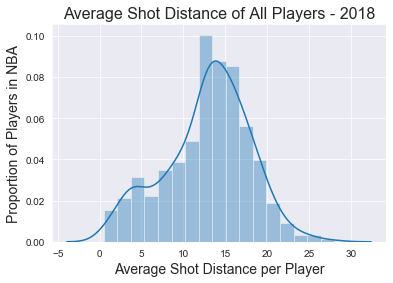

In [504]:
sns.distplot(pre_clust_18['avg_shot_distance_all'])
plt.title('Average Shot Distance of All Players - 2018', fontdict={'size': 16})
plt.xlabel('Average Shot Distance per Player', fontdict={'size':14})
plt.ylabel('Proportion of Players in NBA',  fontdict={'size':14})
plt.savefig('avg_shot_distance.jpeg')

In [515]:
stmt = "SELECT * from nba.box_score"
cursor.execute(stmt)
scores = cursor.fetchall()

field_names = [i[0] for i in cursor.description]
box_scores = pd.DataFrame(scores).dropna()
box_scores.columns = field_names

In [533]:
box_scores_18 = box_scores[box_scores['GAME_ID'].str.contains('00218')]
unique_players_18 = box_scores.drop_duplicates(subset='PLAYER_NAME')
start_positions_18 = pre_clust_18.merge(unique_players_18[['PLAYER_ID', 'START_POSITION']],
                                        left_on='player_id', right_on='PLAYER_ID', how='left')
drop_index = start_positions_18[start_positions_18['START_POSITION']==''].index
positions_18_only = start_positions_18.drop(drop_index)


In [534]:
positions_18_only.groupby('START_POSITION').agg('mean')['avg_shot_distance_all']

START_POSITION
C     8.303303
F    13.080385
G    14.504794
Name: avg_shot_distance_all, dtype: float64

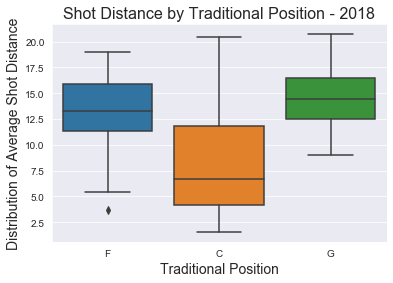

In [540]:
sns.boxplot(x=positions_18_only['START_POSITION'], y=positions_18_only['avg_shot_distance_all'])
plt.title('Shot Distance by Traditional Position - 2018', fontdict={'size':16})
plt.xlabel('Traditional Position', fontdict={'size': 14})
plt.ylabel('Distribution of Average Shot Distance', fontdict={'size': 14})
plt.savefig('distribution_shot_distance_traditional.jpeg')

In [448]:
def display_cluster(cluster, year):
    if year == '2017':
        df = cluster_17_merged
    
    elif year == '2018':
        df = cluster_18_merged
    
    elif year == '2019':
        df = cluster_19_merged
   
    values = df[df['cluster']==cluster]['PLAYER_NAME'].unique()
    
    fig = go.Figure(data=[go.Table(header=dict(values=['Cluster {} -'.format(str(cluster))+ year]),
                     cells=dict(values=[values]))
                         ])
    fig.show()

In [622]:
def display_cluster_trace(cluster, year):
    if year == '2017':
        df = cluster_17_merged
    
    elif year == '2018':
        df = cluster_18_merged
    
    elif year == '2019':
        df = cluster_19_merged
   
    values = df[df['cluster']==cluster]['PLAYER_NAME'].unique()
    data = go.Table(header=dict(values=['Cluster {} -'.format(str(cluster))+ year]),
                     cells=dict(values=[values]))
#     fig = go.Figure(data=[go.Table(header=dict(values=['Cluster {} -'.format(str(cluster))+ year]),
#                      cells=dict(values=[values]))
#                          ])
#     fig.show()
                    
    return data

In [449]:
cluster_18_merged[cluster_18_merged['cluster']==19]['PLAYER_NAME'].unique()

array(['Hassan Whiteside', 'Willie Cauley-Stein', 'Ben Simmons',
       'Richaun Holmes', 'Boban Marjanovic', 'Ivica Zubac',
       'Steven Adams', 'DeAndre Jordan', 'Tristan Thompson', 'Ante Zizic',
       'Rudy Gobert', 'Jahlil Okafor'], dtype=object)

In [450]:
display_cluster(0, '2018')

In [484]:
def player_analysis(player, year):
    
    shot_chart(player, year)
    
    similar_shooters(player, year)
    
    shot_breakdown(player, year)
    
    plot_defenses_against_shot_type(player, year)
    
    if year == '2017':
        cluster = cluster_17_merged[cluster_17_merged['PLAYER_NAME']==player]['cluster']
    
    elif year == '2018':
        cluster = cluster_18_merged[cluster_18_merged['PLAYER_NAME']==player]['cluster']
    
    elif year == '2019':
        cluster = cluster_19_merged[cluster_19_merged['PLAYER_NAME']==player]['cluster']
   
    print(player +' Cluster {}'.format(cluster))

In [485]:
player_analysis('Ben Simmons', '2018')

Ben Simmons Cluster 38528    19
38529    19
38530    19
38531    19
38532    19
         ..
39493    19
39494    19
39495    19
39496    19
39497    19
Name: cluster, Length: 970, dtype: int64


In [486]:
def plot_cluster(cluster, year):
    if year == '2017':
        df = cluster_17_merged
    
    elif year == '2018':
        df = cluster_18_merged
    
    elif year == '2019':
        df = cluster_19_merged
   
    cluster_shot_chart(df, cluster, year)
    
    display_cluster(cluster, year)
    
    shot_breakdown_cluster(cluster, df, year)
    
    def_fgpct_cluster(df, cluster, year)

In [487]:
plot_cluster(19, '2018')

# Interactive NBA Player Data
## Jake Cohen

In [689]:
interact(plot_player, player='Ben Simmons', year='2018')

interactive(children=(Text(value='Ben Simmons', description='player'), Text(value='2018', description='year'),…

<function __main__.plot_player(player, year)>

In [684]:
interact(plot_cluster, cluster=19, year='2018')

interactive(children=(IntSlider(value=19, description='cluster', max=57, min=-19), Text(value='2018', descript…

<function __main__.plot_cluster(cluster, year)>